# Proyek Analisis Data: Bike Dataset
- **Nama:** Tiffany Widjaya
- **Email:** tiffanywidjayaa@gmail.com
- **ID Dicoding:** tiffanywidjaya

## Menentukan Pertanyaan Bisnis

Pada proyek akhir ini, digunakan dua dataset, yaitu:
- `day.csv`: data penyewaan sepeda per hari.
- `hour.csv`: data penyewaan sepeda per jam.

Tujuan proyek:
- Menjawab 2 pertanyaan bisnis menggunakan proses analisis data.
- Membuat visualisasi data untuk mendukung insight.
- Membuat dashboard sederhana menggunakan Streamlit.

Pertanyaan bisnis:
1. Bagaimana tren penyewaan sepeda secara harian dan bulanan? (menggunakan `day.csv`)
2. Pada jam berapa penyewaan sepeda paling ramai di hari kerja dibanding hari libur? (menggunakan `hour.csv`)

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day = pd.read_csv('day.csv')

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset `day.csv` berisi data penyewaan sepeda berdasarkan hari, mulai dari 1 Januari 2011 hingga 31 Desember 2012.
- Terdapat berbagai fitur seperti cuaca (`weathersit`), suhu (`temp`, `atemp`), kelembaban (`hum`), kecepatan angin (`windspeed`), jumlah penyewa kasual (`casual`), jumlah penyewa terdaftar (`registered`), dan total penyewa (`cnt`).

In [5]:
hour = pd.read_csv('hour.csv')

hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `hour.csv` berisi data penyewaan sepeda berdasarkan jam, mulai dari 1 Januari 2011.
- Setiap baris mewakili jumlah penyewaan pada jam tertentu, dengan informasi terkait seperti cuaca, suhu, kelembaban, kecepatan angin, dan jumlah penyewa casual maupun registered.

### Assessing Data

In [6]:
print("Informasi Dataset Day:")
print(day.info())

print("\nInformasi Dataset Hour:")
print(hour.info())

print("\nMissing value day.csv:")
print(day.isnull().sum())

print("\nMissing value hour.csv:")
print(hour.isnull().sum())

Informasi Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
Ra

**Insight:**
- Dataset `day.csv` dan `hour.csv` tidak memiliki missing value di semua kolomnya.
- Tipe data untuk kedua dataset sudah sesuai, dengan kolom numerik bertipe int64/float64 dan kolom tanggal (`dteday`) bertipe object.

### Cleaning Data

In [8]:
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

**Insight:**
- Kolom `dteday` pada dataset `day.csv` dan `hour.csv` telah berhasil diubah menjadi format datetime agar dapat mempermudah analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

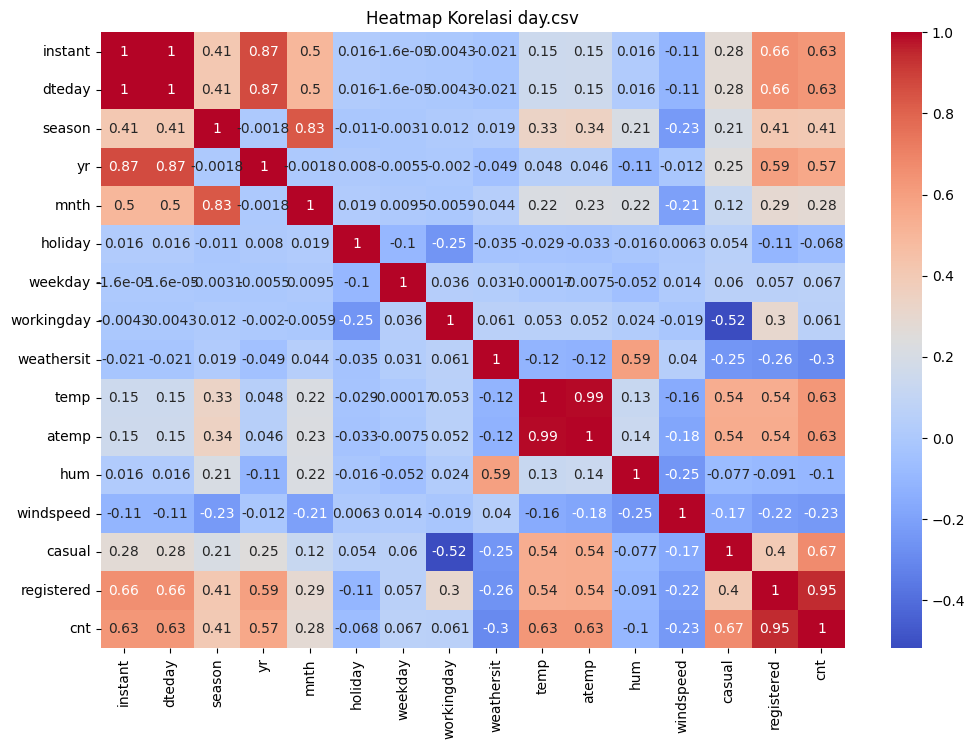

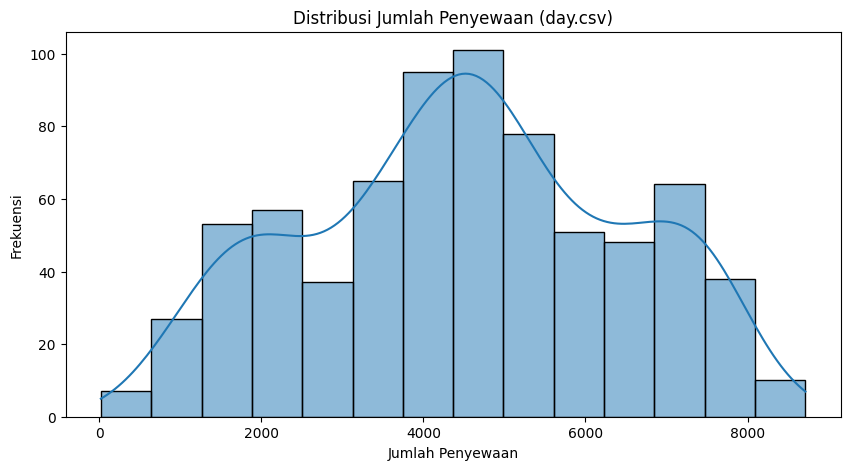

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(day.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi day.csv')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(day['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan (day.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Dari heatmap korelasi, `temp` (temperatur) dan `atemp` (temperatur yang dirasakan) menunjukkan korelasi positif yang kuat dengan `cnt` (jumlah penyewaan).
- Distribusi jumlah penyewaan (`cnt`) membentuk pola distribusi normal namun sedikit miring ke kanan (right-skewed), artinya sebagian besar hari memiliki penyewaan yang tidak terlalu ekstrem.

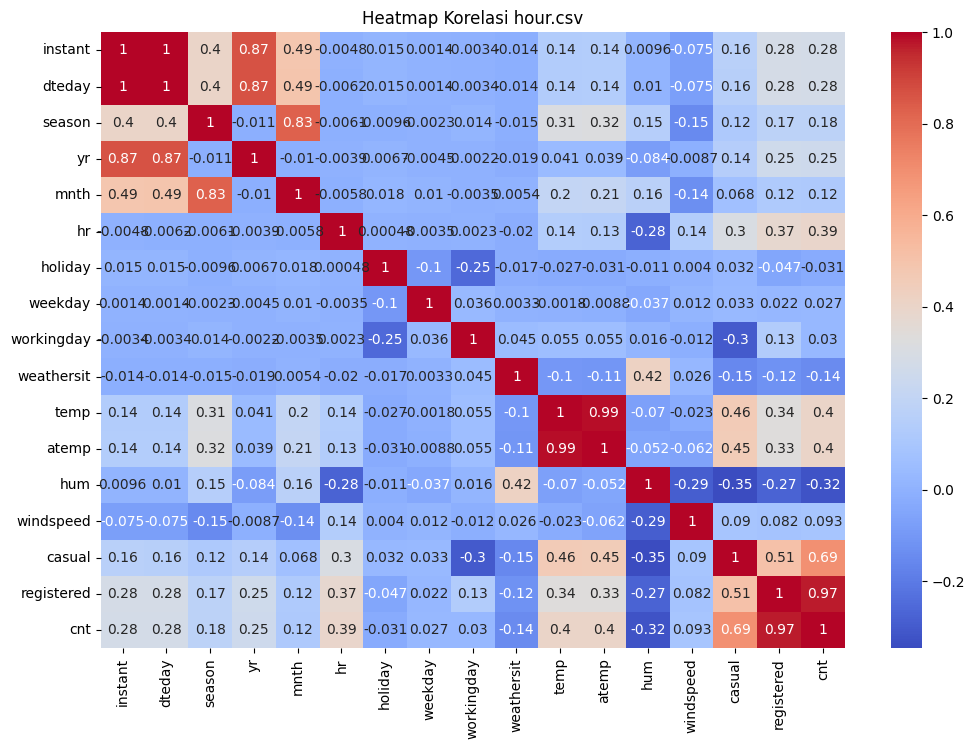

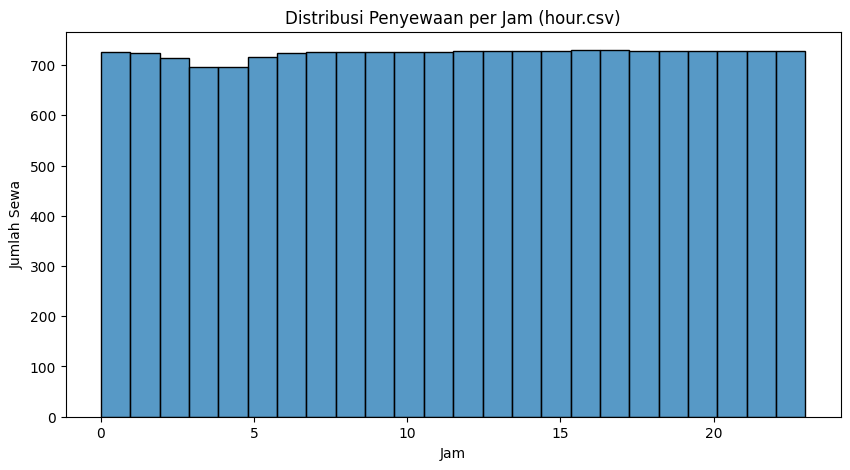

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(hour.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi hour.csv')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(hour['hr'], bins=24)
plt.title('Distribusi Penyewaan per Jam (hour.csv)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sewa')
plt.show()

**Insight:**
- Jumlah penyewaan sepeda (`cnt`) sangat dipengaruhi oleh pengguna terdaftar (`registered`) dengan korelasi sangat kuat (0.97), sedangkan pengguna kasual (`casual`) berpengaruh sedang (0.51). Faktor suhu (`temp`, `atemp`) juga memiliki korelasi positif terhadap jumlah penyewaan.
- Distribusi penyewaan sepeda per jam menunjukkan pola yang relatif merata, tanpa lonjakan tajam pada jam tertentu.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

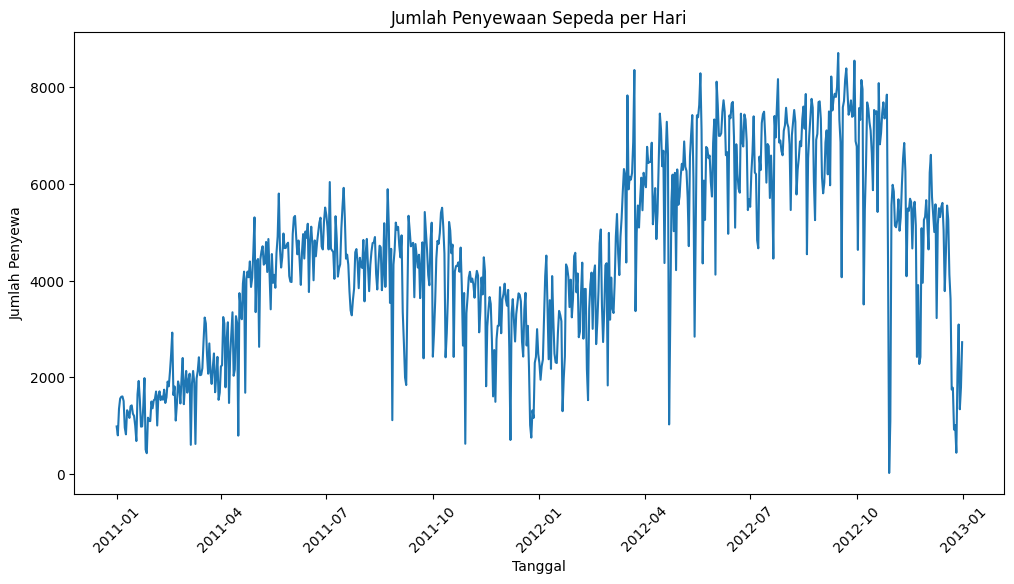

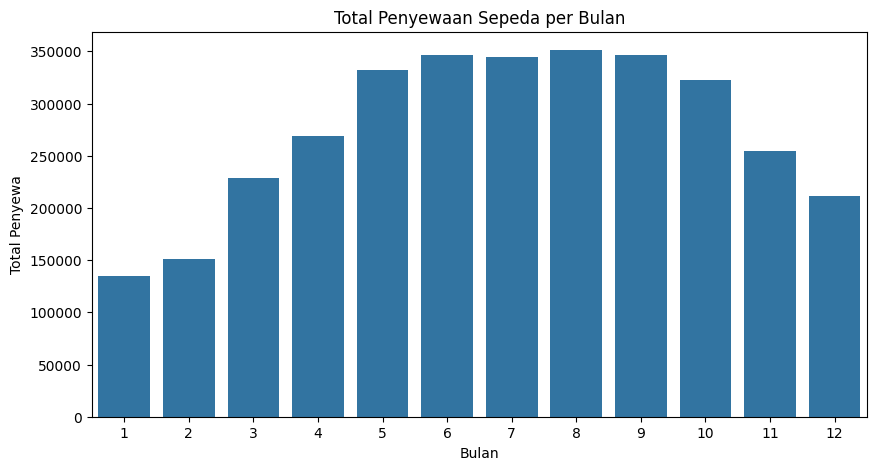

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(x='dteday', y='cnt', data=day)
plt.title('Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewa')
plt.xticks(rotation=45)
plt.show()

day['month'] = day['dteday'].dt.month
monthly_rentals = day.groupby('month')['cnt'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values)
plt.title('Total Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewa')
plt.show()

**Insight:**
- Korelasi tinggi terlihat antara jumlah pengguna terdaftar (`registered`) dan total penyewaan (`cnt`), menunjukkan bahwa penyewa tetap mendominasi penggunaan sepeda.
- Distribusi jumlah penyewaan harian menunjukkan pola mendekati normal, dengan mayoritas penyewaan berkisar di angka 4000–6000 per hari.
- Pada data jam (`hour.csv`), distribusi penyewaan cenderung merata di sepanjang hari, meski ada jam-jam tertentu yang sedikit lebih tinggi frekuensinya.

### Pertanyaan 2:

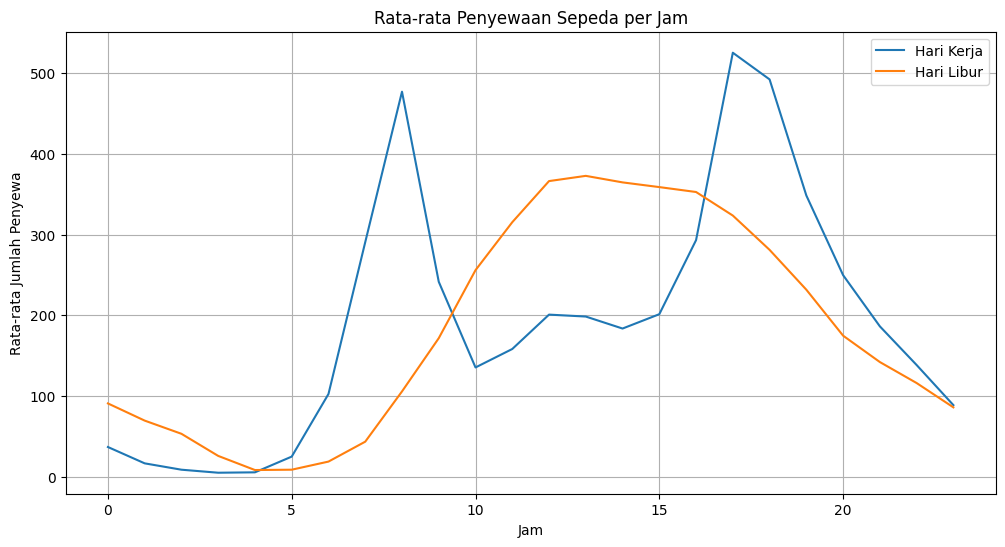

In [12]:
workday = hour[hour['workingday'] == 1]
holiday = hour[hour['workingday'] == 0]

workday_avg = workday.groupby('hr')['cnt'].mean()
holiday_avg = holiday.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=workday_avg.index, y=workday_avg.values, label='Hari Kerja')
sns.lineplot(x=holiday_avg.index, y=holiday_avg.values, label='Hari Libur')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- Pada hari kerja, penyewaan sepeda mengalami dua puncak utama, yaitu sekitar jam 8 pagi dan jam 5 – 6 sore, kemungkinan besar berkaitan dengan aktivitas berangkat dan pulang kerja.
- Di hari libur, pola penyewaan lebih stabil sepanjang hari, dengan puncak ringan sekitar jam 12 siang – 4 sore.
- Pola ini menunjukkan bahwa pada hari libur orang cenderung menggunakan sepeda untuk aktivitas santai, sedangkan pada hari kerja lebih untuk mobilitas rutin.

## Analisis Lanjutan (Opsional)

# Clustering Manual berdasarkan Jumlah Penyewaan

Pada analisis ini, dilakukan pengelompokan hari ke dalam tiga kategori:
- Low Rentals (Jumlah sewa sedikit)
- Medium Rentals (Jumlah sewa sedang)
- High Rentals (Jumlah sewa tinggi)

Tujuan analisis ini untuk memahami distribusi hari berdasarkan volume peminjaman sepeda.


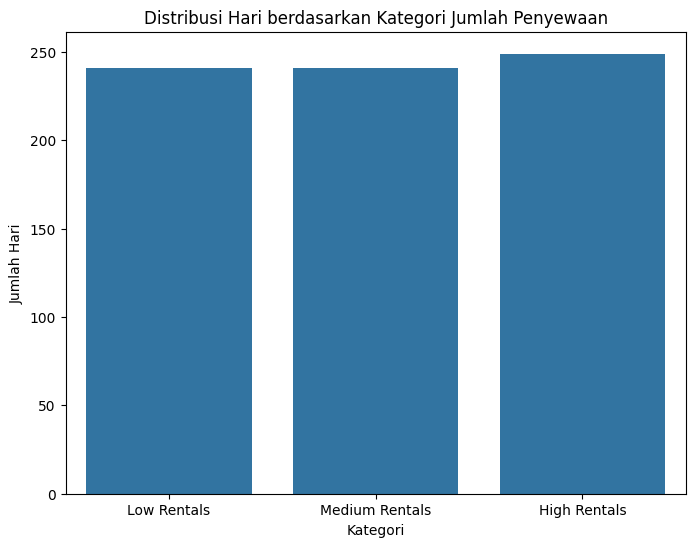

In [13]:
low_threshold = day['cnt'].quantile(0.33)
high_threshold = day['cnt'].quantile(0.66)

def rental_category(cnt):
    if cnt <= low_threshold:
        return 'Low Rentals'
    elif cnt <= high_threshold:
        return 'Medium Rentals'
    else:
        return 'High Rentals'

day['rental_category'] = day['cnt'].apply(rental_category)

plt.figure(figsize=(8,6))
sns.countplot(x='rental_category', data=day, order=['Low Rentals', 'Medium Rentals', 'High Rentals'])
plt.title('Distribusi Hari berdasarkan Kategori Jumlah Penyewaan')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Hari')
plt.show()

**Insight:**
- Sebagian besar hari termasuk dalam kategori Medium Rentals.
- Hari dengan jumlah penyewaan tertinggi relatif lebih sedikit dibandingkan hari dengan penyewaan rendah dan sedang.

## Conclusion

**Conclusion Pertanyaan 1:**
- Jumlah penyewaan sepeda mengalami tren meningkat dari awal hingga pertengahan tahun, kemudian menurun menjelang akhir tahun.
- Puncak total penyewaan sepeda terjadi pada bulan-bulan musim panas, sedangkan jumlah penyewaan menurun saat musim dingin.

**Conclusion Pertanyaan 2:**
- Pada hari kerja, terdapat dua puncak penyewaan sepeda yang signifikan di pagi hari (sekitar jam 8) dan sore hari (sekitar jam 5 - 6 sore), terkait jam berangkat dan pulang kerja.
- Di hari libur, pola penyewaan lebih merata sepanjang hari, dengan sedikit kenaikan di siang hingga sore hari.